In [1]:
import sys
from scipy.io import savemat, loadmat
import os
PACKAGE_PARENT = '../..'
sys.path.append(PACKAGE_PARENT)

import src.utils as utils
from src.params import *
from src.regularizer import GL1
from src.lossfunction import LogisticLoss
from src.naive.ProbGL1 import ProbGL1
from src.naive.Solver import Solver
from matplotlib import pyplot as plt
params['tol'] = 1e-6
params['update_alpha_strategy'] = 'model'
params['method'] = 'adpative'
params['t'] = 1e-3

In [2]:
datasetName = 'diabetes'
loss = 'logit'
lam_shrink = 0.1
frac = 0.5
fileType = fileTypeDict[datasetName]
print("Working on: {}...".format(datasetName))
X, y = utils.set_up_xy(datasetName, fileType, dbDir='../../../db')
f = LogisticLoss(X, y, datasetName)
p = X.shape[1]
num_of_groups = max(int(p * frac), 1)
group = utils.gen_group(p, num_of_groups)
lammax_path = f'../../../db/lammax-{datasetName}-{frac}.mat'
if os.path.exists(lammax_path):
    lammax = loadmat(lammax_path)["lammax"][0][0]
    print(f"loading lammax from: {lammax_path}")
else:
    lammax = utils.lam_max(X, y, group, loss)
    savemat(lammax_path, {"lammax": lammax})
    print(f"save lammax to: {lammax_path}")
Lambda = lammax * lam_shrink
r = GL1(Lambda=Lambda, group=group)
prob = ProbGL1(f, r)

Working on: diabetes...
loading lammax from: ../../../db/lammax-diabetes-0.5.mat


In [3]:
params['init_perturb'] = 1e3
solver = Solver(prob, params)
info_dia_model_perturb = solver.solve(explore=True)

params['init_perturb'] = 0.0
solver = Solver(prob, params)
info_dia_model_exact = solver.solve(explore=True)


Exit: Optimal Solution Found


Exit: Optimal Solution Found



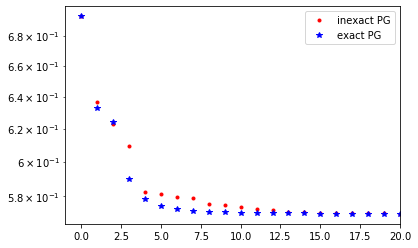

In [4]:
Fseq_inexact = info_dia_model_perturb['Fseq']
Fseq_exact = info_dia_model_exact['Fseq']
plt.plot(Fseq_inexact, 'r.', label='inexact PG', )
plt.plot(Fseq_exact, 'b*', label='exact PG', )
plt.yscale('log')
plt.xlim((-1, 20))
plt.legend()

In [5]:
datasetName = 'a9a'
loss = 'logit'
lam_shrink = 0.1
frac = 0.5
fileType = fileTypeDict[datasetName]
print("Working on: {}...".format(datasetName))
X, y = utils.set_up_xy(datasetName, fileType, dbDir='../../../db')
f = LogisticLoss(X, y, datasetName)
p = X.shape[1]
num_of_groups = max(int(p * frac), 1)
group = utils.gen_group(p, num_of_groups)
lammax_path = f'../../../db/lammax-{datasetName}-{frac}.mat'
if os.path.exists(lammax_path):
    lammax = loadmat(lammax_path)["lammax"][0][0]
    print(f"loading lammax from: {lammax_path}")
else:
    lammax = utils.lam_max(X, y, group, loss)
    savemat(lammax_path, {"lammax": lammax})
    print(f"save lammax to: {lammax_path}")
Lambda = lammax * lam_shrink
r = GL1(Lambda=Lambda, group=group)
prob = ProbGL1(f, r)

Working on: a9a...
loading lammax from: ../../../db/lammax-a9a-0.5.mat


In [6]:
params['init_perturb'] = 1e3
solver = Solver(prob, params)
info_dia_model_perturb = solver.solve(explore=True)

params['init_perturb'] = 0.0
solver = Solver(prob, params)
info_dia_model_exact = solver.solve(explore=True)


Exit: Optimal Solution Found


Exit: Optimal Solution Found



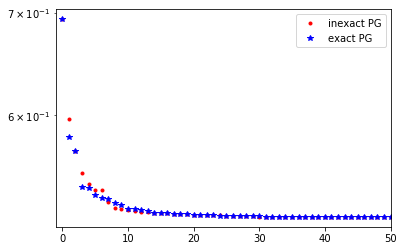

In [7]:
Fseq_inexact = info_dia_model_perturb['Fseq']
Fseq_exact = info_dia_model_exact['Fseq']
plt.plot(Fseq_inexact, 'r.', label='inexact PG', )
plt.plot(Fseq_exact, 'b*', label='exact PG', )
plt.yscale('log')
plt.xlim((-1, 50))
plt.legend()